In [364]:
import torch
import numpy as np
from torch import nn
from skimage.io import imshow
import matplotlib.pyplot as plt
from skimage.io import imshow
import matplotlib

from interpolation import two_point_interpolation, analogies,gaussian_interpolation,\
    n_point_interpolation,vicinity_sampling
%matplotlib inline

In [365]:
class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d(     nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. (ngf*8) x 4 x 4
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. (ngf*2) x 16 x 16
            nn.ConvTranspose2d(ngf * 2,     ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. (ngf) x 32 x 32
            nn.ConvTranspose2d(    ngf,      nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. (nc) x 64 x 64
)

In [366]:
def plot_torch_picture(tensor, ax=None):
    tensor_to_print = (tensor + 1) / 2
    if ax is None:
        plt.figure(figsize=(2,2))
        plt.imshow(tensor_to_print.squeeze(0).detach().permute(1,2,0).numpy(), norm=matplotlib.colors.Normalize(vmin=0, vmax=1))  
    else:
        ax.imshow(tensor_to_print.squeeze(0).detach().permute(1,2,0).numpy(), norm=matplotlib.colors.Normalize(vmin=0, vmax=1))

In [367]:
ngpu = 1
nz = 100
ngf = 64
ndf = 64
nc = 3

In [368]:
netG = Generator(ngpu=ngpu).to('cpu')

In [369]:
netG.load_state_dict(torch.load('output_folder_default_continue/netG_epoch_17.pth', map_location='cpu'))

In [370]:
netG.eval()

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)

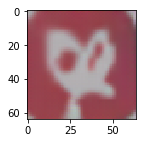

In [371]:
rand = torch.randn(1, 100, 1, 1, device='cpu')
plot_torch_picture(netG.main(rand))

In [372]:
def interpolation_sequence_generation(list_t):
    rand1 = torch.randn(1, 100, 1, 1, device='cpu')
    rand2 = torch.randn(1, 100, 1, 1, device='cpu')
    interpolation_ot =[]
    interpolation_no_scale = []
    for t in reversed(list_t):
        interpolation_ot.append(two_point_interpolation(rand1, rand2, t=t, do_scale=True))
        interpolation_no_scale.append(two_point_interpolation(rand1, rand2,t = t, do_scale=False))
    
    output1 = netG.main(rand1)
    output2 = netG.main(rand2)

    fig, axs = plt.subplots(nrows=2, ncols=len(list_t)+2, sharex=True,figsize = (20,5))

    plot_torch_picture(output1, ax = axs[0,0])
    plot_torch_picture(output2, ax = axs[0,len(list_t)+1])
    plot_torch_picture(output1, ax = axs[1,0])
    plot_torch_picture(output2, ax = axs[1,len(list_t)+1])
    for i in range(len(list_t)):
        plot_torch_picture(netG.main(interpolation_ot[i]), ax = axs[0,i+1])
        plot_torch_picture(netG.main(interpolation_no_scale[i]), ax = axs[1,i+1])
    pass

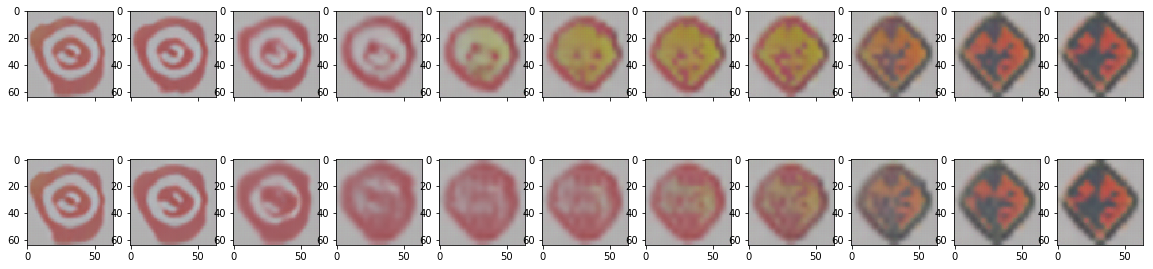

In [380]:
list_t = np.linspace(0.1, 0.9, 9)

interpolation_sequence_generation(list_t)

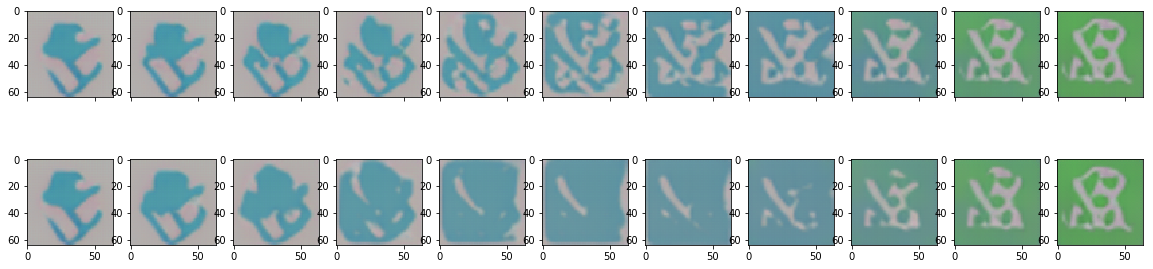

In [362]:
list_t = np.linspace(0.1, 0.9, 9)

interpolation_sequence_generation(list_t)

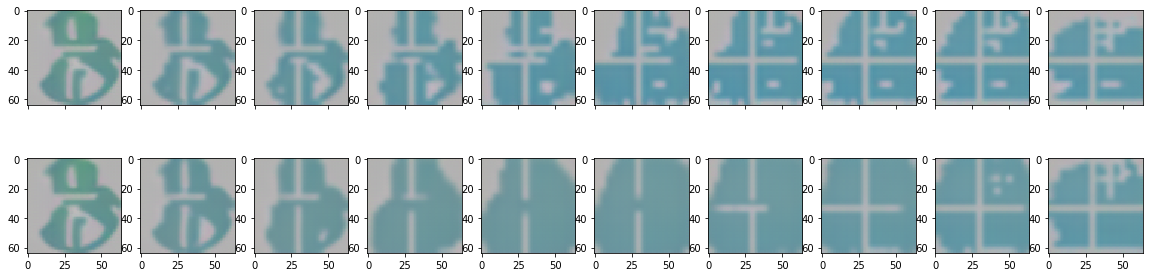

In [258]:
interpolation_sequence_generation(list_t)

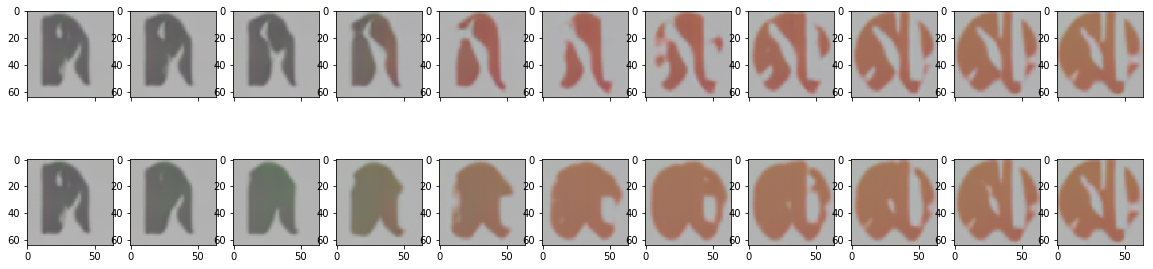

In [290]:
interpolation_sequence_generation(list_t)

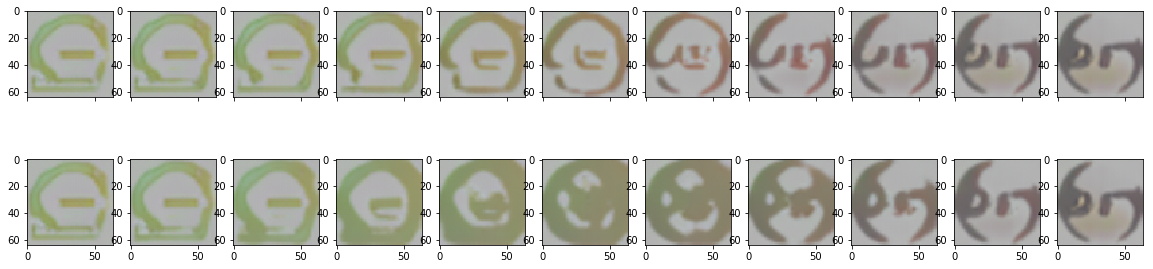

In [305]:
interpolation_sequence_generation(list_t)

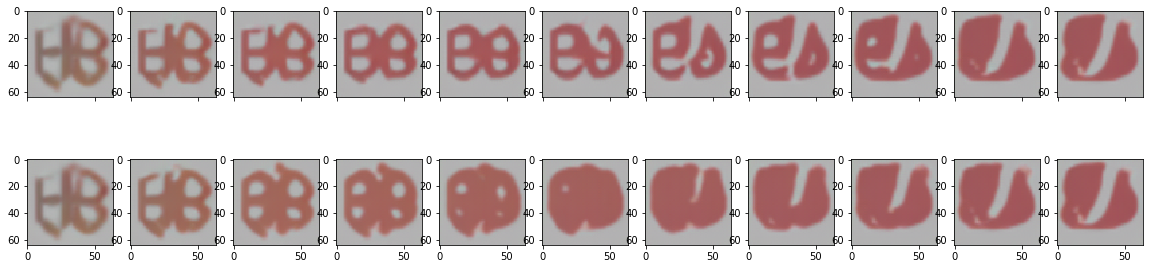

In [312]:
interpolation_sequence_generation(list_t)

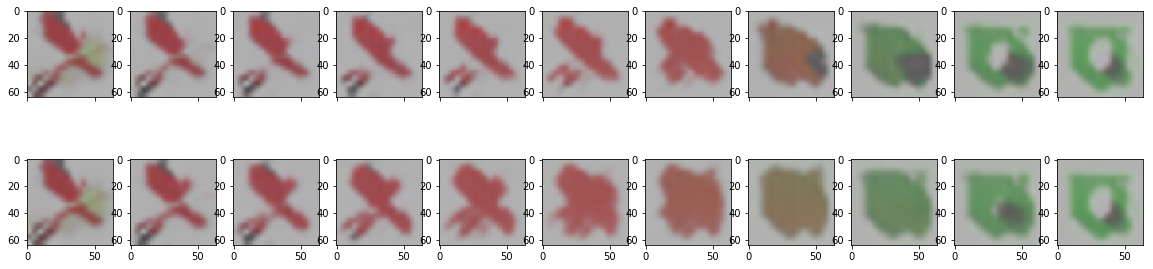

In [330]:
interpolation_sequence_generation(list_t)

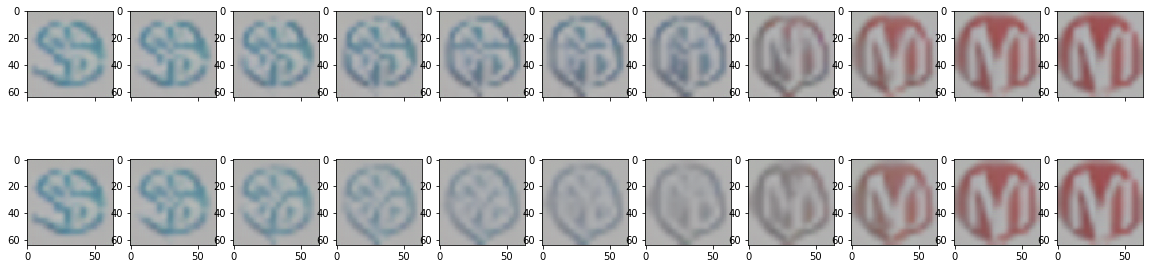

In [332]:
interpolation_sequence_generation(list_t)

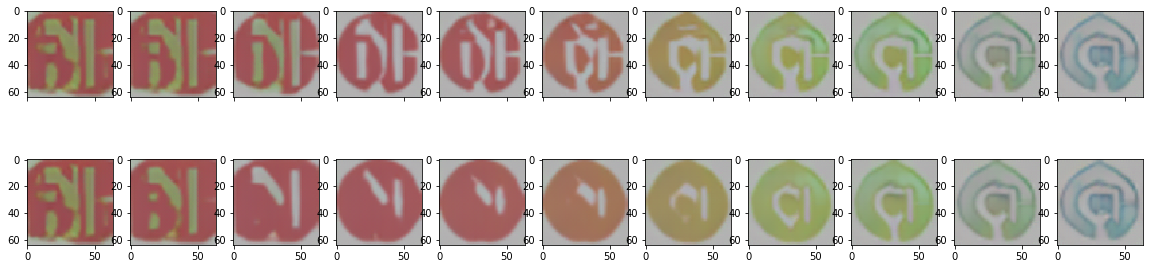

In [339]:
interpolation_sequence_generation(list_t)

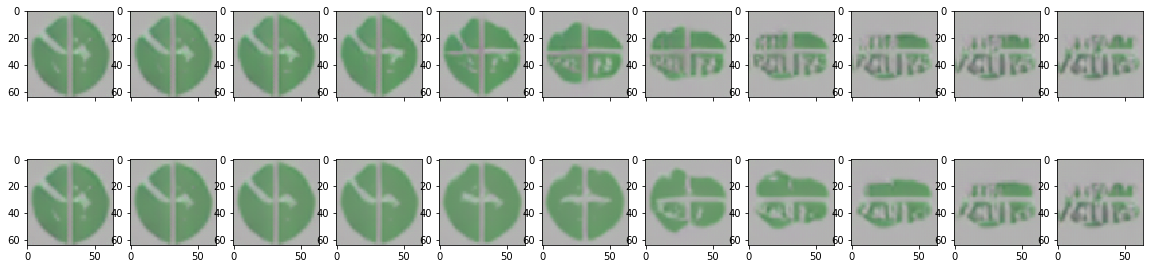

In [354]:
interpolation_sequence_generation(list_t)